In [2]:
#run only once!
%load_ext autoreload
%autoreload 2
import os
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [3]:
import numpy as np
from phidl import LayerSet
from phidl import quickplot as qp
from phidl import Path, CrossSection, Device
import phidl.path as pp
import phidl.geometry as pg
import phidl
import matplotlib.pyplot as plt
from deprecated.Bertram_Functions.MyPhidlFunctions import *
from Schuster_Resonators.resonator import ChipResonatorsTline, ChipTline, ChipResonatorsTwoTlines, ChipResonatorsThreeTlines
from Schuster_Resonators.approx_Schuster import *
from CPW.cpw import *

Permeability and thickness heterostructure

In [4]:
epsilon_r = [15.18, 16, 15.18, 16, 11.9]
thickness_subs = [50e-9, 20e-9, 600e-9, 300e-9, 600e-6]

Feedline

In [5]:
epsilon_r = 11.9
thickness_subs = 500e-6
FeedlineWidth = 52
FeedlineLength  = 5400
FeedlineGap= 20
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 200
BondpadGap = 200*50/80

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth*1e-6, FeedlineGap*1e-6, epsilon_r, thickness_subs, ind_kin_sq=13.5e-12), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth*1e-6, FeedlineGap*1e-6, epsilon_r, thickness_subs, ind_kin_sq=13.5e-12, length_CPW=(FeedlineLength + FeedlineTaperLength + BondpadLength)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.26339721808462 Ohm
Frequency of the feedline is 2.1923824876462703 GHz


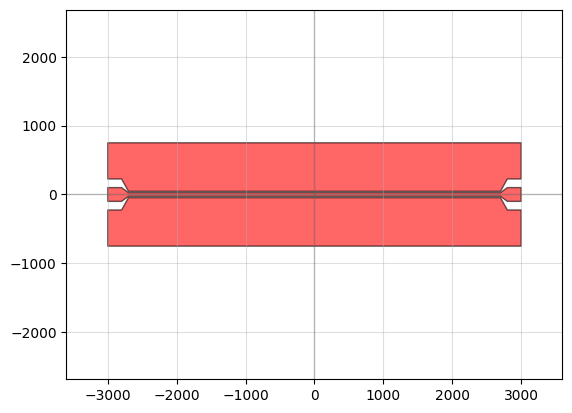

In [6]:
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength, 1500]

_, _, TLine = ChipTline(ChipSize,
                          FeedlineWidth, 
                          FeedlineLength, 
                          FeedlineGap, 
                          FeedlineTaperLength, 
                          BondpadWidth, 
                          BondpadLength, 
                          BondpadGap)
qp(TLine)
#TLine.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241001-GeRes-Pt-13pHsq\Tline-2.gds")

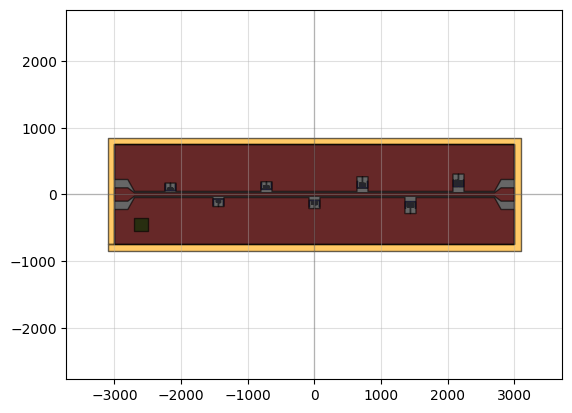

In [7]:
NumberOfResonators = int(7)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
CapacitorVerticalLength = np.ones(NumberOfResonators)*100
CapacitorWidth = np.ones(NumberOfResonators)*5

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[5, 7, 7, 9, 10, 12, 14]
InductorVerticalLength = np.ones(NumberOfResonators)*5
InductorEndLength = np.ones(NumberOfResonators)*([60] + [50] + [50]*2 + [90]*3)
InductorHorizontalLength = np.ones(NumberOfResonators)*[66, 60, 75, 75, 82, 90, 100]
InductorWidth = np.ones(NumberOfResonators)*0.6
TaperWidth = np.ones(NumberOfResonators)*20
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*[10, 20, 30, 40, 50, 60, 70]
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100

# freqs = []
# for i in range(NumberOfResonators):
#     print(f'Resonator {i+1}')
#     freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
#                                             CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
#                                             InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, 13.5e-12,
#                                         epsilon_r, thickness_subs)/1e9)                                        

# print('Inductor total length is', InductorTotalLength)
# print('The frequencies are', freqs)

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads)

# chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241001-GeRes-Pt-13pHsq\20241001-GeRes-Pt-13pHsq-1.gds")
qp(chip)

Resonator 1
 Geometric: 0.7658559428878824 nH/m
 Kinetic: 16.65 nH/m
 Ltot: 17.415855942887884 nH
 Cg: 56.84785371309432 fF
 Cc: 0.4057650343870702 fF
Inductor total length is [740.]
The frequencies are [np.float64(5.040182347020097)]


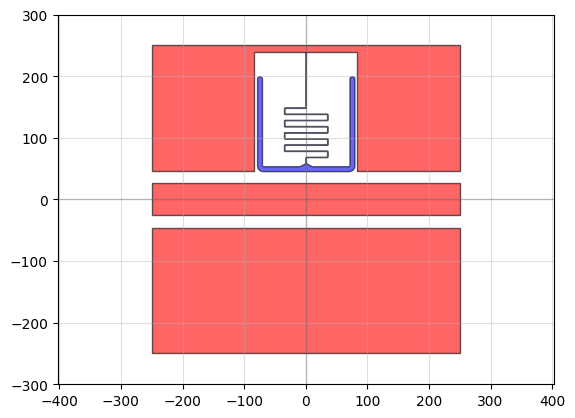

In [ ]:
NumberOfResonators = int(1)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
CapacitorVerticalLength = np.ones(NumberOfResonators)*150
CapacitorWidth = np.ones(NumberOfResonators)*8

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[7]
InductorVerticalLength = np.ones(NumberOfResonators)*10
InductorEndLength = np.ones(NumberOfResonators)*[70]
InductorHorizontalLength = np.ones(NumberOfResonators)*[70]
InductorWidth = np.ones(NumberOfResonators)*0.6
TaperWidth = np.ones(NumberOfResonators)*20
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*[0]
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100

freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, 13.5e-12,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)


FeedlineLength = 500
ChipSize = [FeedlineLength, 500]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)

#chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241001-GeRes-Pt-13pHsq\20241001-GeRes-Pt-13pHsq-Last-1.gds")
qp(chip)

Resonator 1
 Geometric: 1.2443913315545683 nH/m
 Kinetic: 17.955000000000002 nH/m
 Ltot: 19.19939133155457 nH
 Cg: 50.96832050690628 fF
 Cc: 0.43973447651763514 fF
Inductor total length is [1330.]
The frequencies are [np.float64(5.0659490186010725)]


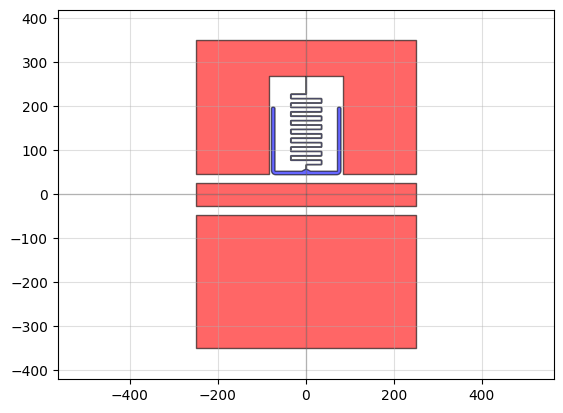

In [ ]:
NumberOfResonators = int(1)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
CapacitorVerticalLength = np.ones(NumberOfResonators)*150
CapacitorWidth = np.ones(NumberOfResonators)*8

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[15]
InductorVerticalLength = np.ones(NumberOfResonators)*10
InductorEndLength = np.ones(NumberOfResonators)*[20]
InductorHorizontalLength = np.ones(NumberOfResonators)*[70]
InductorWidth = np.ones(NumberOfResonators)*1
TaperWidth = np.ones(NumberOfResonators)*20
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*[0]
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100

freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, 13.5e-12,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)
FeedlineLength = 500
ChipSize = [FeedlineLength, 700]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)

#chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241115-juliantryingstuff\singleresonator_5GHz.gds")
qp(chip)

Resonator 1
 Geometric: 0.9309111029930295 nH/m
 Kinetic: 20.25 nH/m
 Ltot: 21.18091110299303 nH
 Cg: 56.84785371309432 fF
 Cc: 0.4057650343870702 fF
Resonator 2
 Geometric: 0.596129678686359 nH/m
 Kinetic: 7.425 nH/m
 Ltot: 8.021129678686359 nH
 Cg: 48.91731131677377 fF
 Cc: 0.4532519639424956 fF
Inductor total length is [900. 660.]
The frequencies are [np.float64(4.570317189451233), np.float64(7.9977591561242765)]


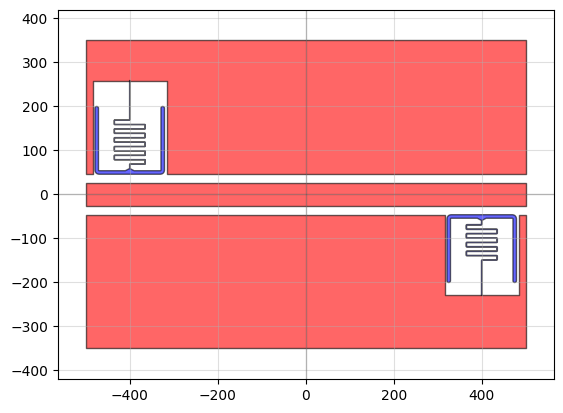

In [7]:
NumberOfResonators = int(2)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[150,150]
CapacitorVerticalLength = np.ones(NumberOfResonators)*150
CapacitorWidth = np.ones(NumberOfResonators)*8

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[9, 6]
InductorVerticalLength = np.ones(NumberOfResonators)*[10,10]
InductorEndLength = np.ones(NumberOfResonators)*[70 ,70]
InductorHorizontalLength = np.ones(NumberOfResonators)*[70, 70]
InductorWidth = np.ones(NumberOfResonators)*[0.6,1.2]
TaperWidth = np.ones(NumberOfResonators)*20
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*[0]
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100

freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, 13.5e-12,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)
FeedlineLength = 1000
ChipSize = [FeedlineLength, 700]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)

chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241115-juliantryingstuff\tworesonators_4-8GHz.gds")
qp(chip)

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\localadmin\AppData\Local\Temp\ipykernel_3980\2385767682.py:7: SyntaxWarning: invalid escape sequence '\d'
  data_tworesonators = np.loadtxt('deprecated\dataS21_tworesonators.txt')


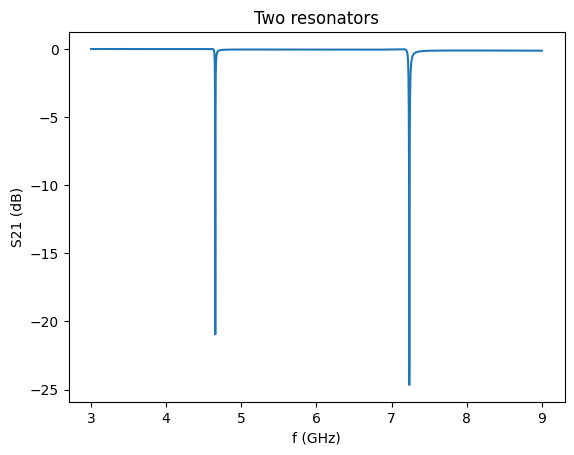

In [59]:
import numpy as np
from scipy.signal import find_peaks

import matplotlib.pyplot as plt

# Load data from txt file
data_tworesonators = np.loadtxt('deprecated\dataS21_tworesonators.txt')

# Assuming the data has two columns: x and y
x = data_tworesonators[:, 0]
y = data_tworesonators[:, 1]



# Plot the data
plt.plot(x, y)
plt.xlabel('f (GHz)')
plt.ylabel('S21 (dB)')
plt.title('Two resonators')
plt.show()

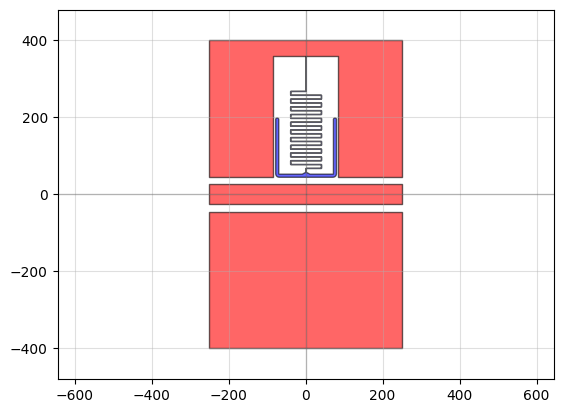

In [22]:
#4p2GHz
NumberOfResonators = int(1)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
CapacitorVerticalLength = np.ones(NumberOfResonators)*150
CapacitorWidth = np.ones(NumberOfResonators)*8

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[18]
InductorVerticalLength = np.ones(NumberOfResonators)*10
InductorEndLength = np.ones(NumberOfResonators)*([80] )
InductorHorizontalLength = np.ones(NumberOfResonators)*[80]
InductorWidth = np.ones(NumberOfResonators)*0.6
TaperWidth = np.ones(NumberOfResonators)*20
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*[0]
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100

# freqs = []
# for i in range(NumberOfResonators):
#     print(f'Resonator {i+1}')
#     freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
#                                             CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
#                                             InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, 13.5e-12,
#                                         epsilon_r, thickness_subs)/1e9)                                        

# print('Inductor total length is', InductorTotalLength)
# print('The frequencies are', freqs)
FeedlineLength = 500
ChipSize = [FeedlineLength, 800]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)

#chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241001-GeRes-Pt-13pHsq\20241001-GeRes-Pt-13pHsq-First-2.gds")
qp(chip)

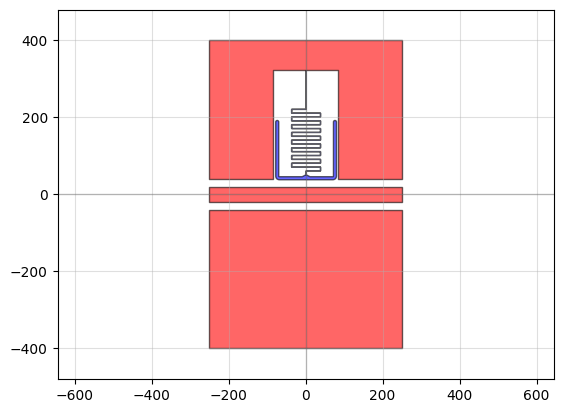

In [ ]:
#5GHz
NumberOfResonators = int(1)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
CapacitorVerticalLength = np.ones(NumberOfResonators)*150
CapacitorWidth = np.ones(NumberOfResonators)*8

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[15]
InductorVerticalLength = np.ones(NumberOfResonators)*10
InductorEndLength = np.ones(NumberOfResonators)*([80] )
InductorHorizontalLength = np.ones(NumberOfResonators)*[75]
InductorWidth = np.ones(NumberOfResonators)*0.6
TaperWidth = np.ones(NumberOfResonators)*20
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*[0]
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100

# freqs = []
# for i in range(NumberOfResonators):
#     print(f'Resonator {i+1}')
#     freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
#                                             CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
#                                             InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, 13.5e-12,
#                                         epsilon_r, thickness_subs)/1e9)                                        

# print('Inductor total length is', InductorTotalLength)
# print('The frequencies are', freqs)
FeedlineLength = 500
ChipSize = [FeedlineLength, 800]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)

#chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241001-GeRes-Pt-13pHsq\20241001-GeRes-Pt-13pHsq-First-1.gds")
qp(chip)

In [ ]:
# 5p6GHz

NumberOfResonators = int(1)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
CapacitorVerticalLength = np.ones(NumberOfResonators)*150
CapacitorWidth = np.ones(NumberOfResonators)*8

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[12]
InductorVerticalLength = np.ones(NumberOfResonators)*10
InductorEndLength = np.ones(NumberOfResonators)*([80] )
InductorHorizontalLength = np.ones(NumberOfResonators)*[70]
InductorWidth = np.ones(NumberOfResonators)*0.6
TaperWidth = np.ones(NumberOfResonators)*20
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*[0]
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100

# freqs = []
# for i in range(NumberOfResonators):
#     print(f'Resonator {i+1}')
#     freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
#                                             CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
#                                             InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, 13.5e-12,
#                                         epsilon_r, thickness_subs)/1e9)                                        

# print('Inductor total length is', InductorTotalLength)
# print('The frequencies are', freqs)
FeedlineLength = 500
ChipSize = [FeedlineLength, 800]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)

# chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241001-GeRes-Pt-13pHsq\20241001-GeRes-Pt-13pHsq-First-1.gds")
qp(chip)

Full chip

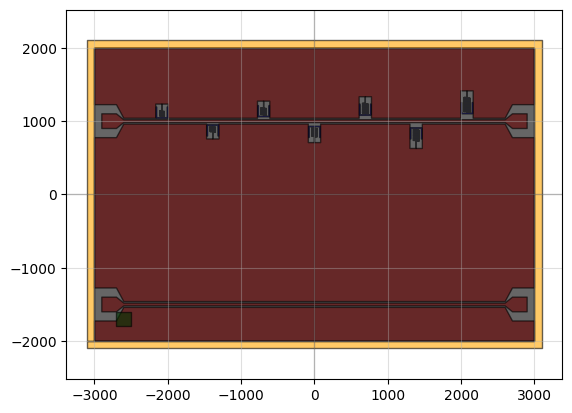

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20241001-GeRes-Pt-13pHsq\\20241001-GeRes-Pt-13pHsq-4x6.gds'

In [ ]:
NumberOfResonators = int(7)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
CapacitorVerticalLength = np.ones(NumberOfResonators)*150
CapacitorWidth = np.ones(NumberOfResonators)*8
# 7p6 ; 7p2 ; 6p5 ; 5p8; 5p6 ; 5 ; 4p4
NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[7, 7, 9, 10, 12, 15, 18]
InductorVerticalLength = np.ones(NumberOfResonators)*10
InductorEndLength = np.ones(NumberOfResonators)*([70, 70, 70, 70,  80, 80, 80] )
InductorHorizontalLength = np.ones(NumberOfResonators)*[60,70, 70,  72.5, 75,  75, 80]
InductorWidth = np.ones(NumberOfResonators)*0.6
TaperWidth = np.ones(NumberOfResonators)*20
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*[0, 10, 20, 30, 40, 50, 60]
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100

FeedlineLength = 5200
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength + 2*FinalSpacingBondpads, 4000]

c, metal, chip = ChipResonatorsTwoTlines(ChipSize, NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth,InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads ,
                        MWO_simulation = False,
                        cap_sim = False,
                        ypos_tlines = [1000, -1500])

qp(chip)
#chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241001-GeRes-Pt-13pHsq\20241001-GeRes-Pt-13pHsq-4x6.gds")


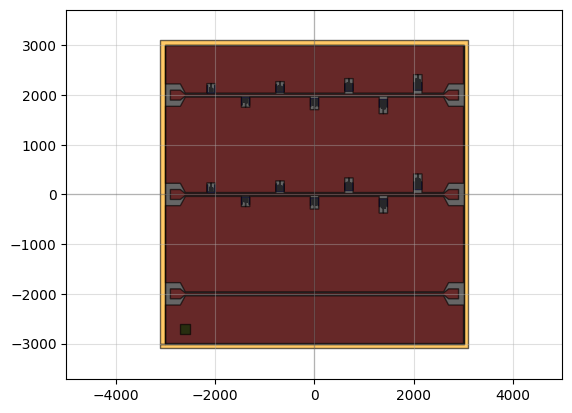

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20241001-GeRes-Pt-13pHsq\\20241001-GeRes-Pt-13pHsq-6x6.gds'

In [ ]:
NumberOfResonators = int(7)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
CapacitorVerticalLength = np.ones(NumberOfResonators)*150
CapacitorWidth = np.ones(NumberOfResonators)*8
# 7p6 ; 7p2 ; 6p5 ; 5p8; 5p6 ; 5 ; 4p4
NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[7, 7, 9, 10, 12, 15, 18]
InductorVerticalLength = np.ones(NumberOfResonators)*10
InductorEndLength = np.ones(NumberOfResonators)*([70, 70, 70, 70,  80, 80, 80] )
InductorHorizontalLength = np.ones(NumberOfResonators)*[60,70, 70,  72.5, 75,  75, 80]
InductorWidth = np.ones(NumberOfResonators)*0.6
TaperWidth = np.ones(NumberOfResonators)*20
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*[0, 10, 20, 30, 40, 50, 60]
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100

FeedlineLength = 5200
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength + 2*FinalSpacingBondpads, 6000]

c, metal, chip = ChipResonatorsThreeTlines(ChipSize, NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth,InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads ,
                        MWO_simulation = False,
                        cap_sim = False,
                        ypos_tlines = [2000, 0, -2000])

qp(chip)
#chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241001-GeRes-Pt-13pHsq\20241001-GeRes-Pt-13pHsq-6x6.gds")
